In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse import csr_matrix

# Define students and classes
students = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank']
classes = ['Math', 'Physics', 'Chemistry', 'Biology']

# Create incidence matrix (students x classes)
# 1 = student enrolled in class, 0 = not enrolled
incidence_matrix = np.array([
    [1, 1, 0, 0],  # Alice: Math, Physics
    [1, 0, 1, 0],  # Bob: Math, Chemistry
    [0, 1, 1, 1],  # Charlie: Physics, Chemistry, Biology
    [1, 1, 0, 1],  # Diana: Math, Physics, Biology
    [0, 0, 1, 1],  # Eve: Chemistry, Biology
    [1, 0, 0, 1]   # Frank: Math, Biology
])

print("Incidence Matrix (Students × Classes):")
print("        ", "  ".join(f"{cls:>9}" for cls in classes))
for i, student in enumerate(students):
    print(f"{student:>8}: {incidence_matrix[i]}")

Incidence Matrix (Students × Classes):
              Math    Physics  Chemistry    Biology
   Alice: [1 1 0 0]
     Bob: [1 0 1 0]
 Charlie: [0 1 1 1]
   Diana: [1 1 0 1]
     Eve: [0 0 1 1]
   Frank: [1 0 0 1]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse import csr_matrix

# Define students and classes
students = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank']
classes = ['Math', 'Physics', 'Chemistry', 'Biology']

# Create incidence matrix (students x classes)
# 1 = student enrolled in class, 0 = not enrolled
incidence_matrix = np.array([
    [1, 1, 0, 0],  # Alice: Math, Physics
    [1, 0, 1, 0],  # Bob: Math, Chemistry
    [0, 1, 1, 1],  # Charlie: Physics, Chemistry, Biology
    [1, 1, 0, 1],  # Diana: Math, Physics, Biology
    [0, 0, 1, 1],  # Eve: Chemistry, Biology
    [1, 0, 0, 1]   # Frank: Math, Biology
])

print("Incidence Matrix (Students × Classes):")
print("        ", "  ".join(f"{cls:>9}" for cls in classes))
for i, student in enumerate(students):
    print(f"{student:>8}: {incidence_matrix[i]}")

Incidence Matrix (Students × Classes):
              Math    Physics  Chemistry    Biology
   Alice: [1 1 0 0]
     Bob: [1 0 1 0]
 Charlie: [0 1 1 1]
   Diana: [1 1 0 1]
     Eve: [0 0 1 1]
   Frank: [1 0 0 1]


In [3]:
# Create bipartite graph from incidence matrix
def create_bipartite_graph_from_incidence(incidence_matrix, students, classes):
    G = nx.Graph()
    
    # Add student nodes with bipartite attribute = 0
    G.add_nodes_from(students, bipartite=0)
    
    # Add class nodes with bipartite attribute = 1
    G.add_nodes_from(classes, bipartite=1)
    
    # Add edges based on incidence matrix
    for i, student in enumerate(students):
        for j, class_name in enumerate(classes):
            if incidence_matrix[i, j] == 1:
                G.add_edge(student, class_name)
    
    return G

# Create the graph
G = create_bipartite_graph_from_incidence(incidence_matrix, students, classes)

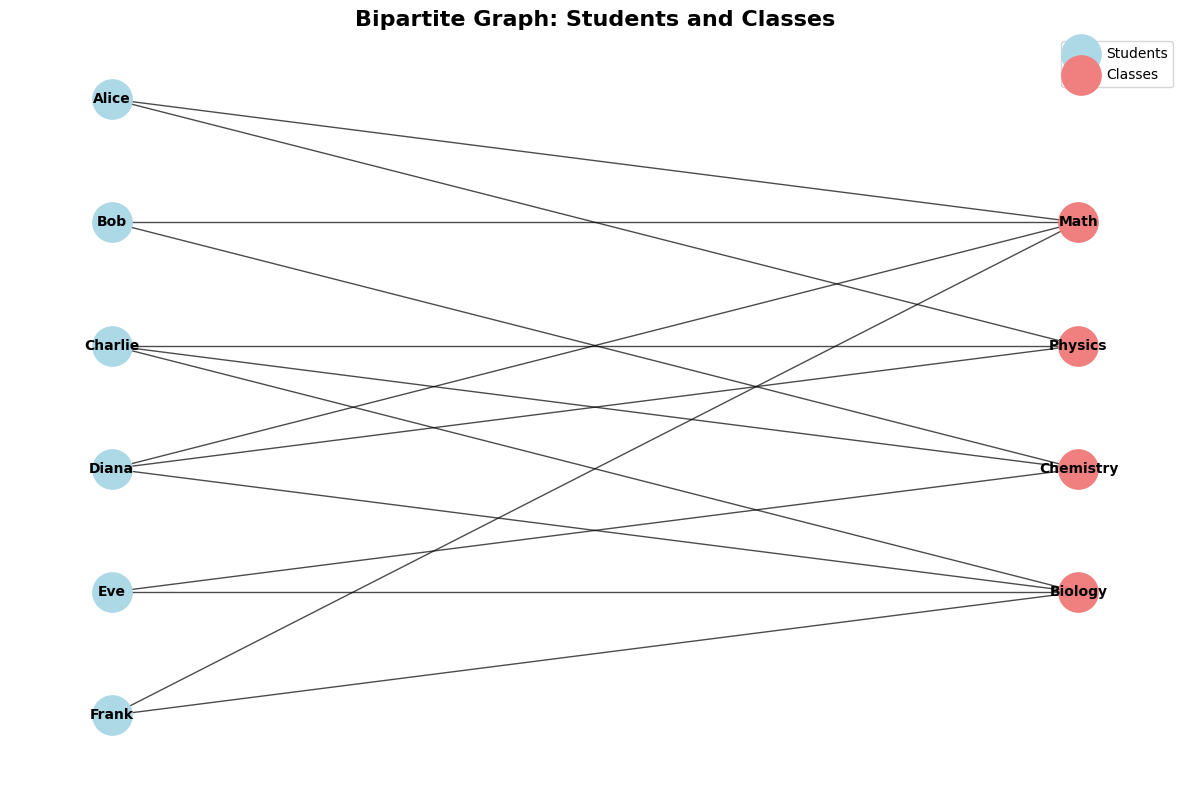

In [4]:
# Visualize the bipartite graph
plt.figure(figsize=(12, 8))

# Position nodes in two columns
pos = {}
# Position students on the left
for i, student in enumerate(students):
    pos[student] = (0, len(students) - i - 1)

# Position classes on the right
for i, class_name in enumerate(classes):
    pos[class_name] = (1, len(classes) - i - 1 + (len(students) - len(classes)) / 2)

# Draw the graph
nx.draw_networkx_nodes(G, pos, nodelist=students, node_color='lightblue', 
                       node_size=800, label='Students')
nx.draw_networkx_nodes(G, pos, nodelist=classes, node_color='lightcoral', 
                       node_size=800, label='Classes')
nx.draw_networkx_edges(G, pos, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title('Bipartite Graph: Students and Classes', fontsize=16, fontweight='bold')
plt.legend()
plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Edge list format: each row represents a connection between two entities
# For affiliation networks, this typically means (person, affiliation)
edge_list_data = [
    ('Alice', 'Math'),
    ('Alice', 'Physics'),
    ('Bob', 'Math'),
    ('Bob', 'Chemistry'),
    ('Charlie', 'Physics'),
    ('Charlie', 'Chemistry'),
    ('Charlie', 'Biology'),
    ('Diana', 'Math'),
    ('Diana', 'Physics'),
    ('Diana', 'Biology'),
    ('Eve', 'Chemistry'),
    ('Eve', 'Biology'),
    ('Frank', 'Math'),
    ('Frank', 'Biology')
]

# Create DataFrame for easier manipulation
edge_df = pd.DataFrame(edge_list_data, columns=['Student', 'Class'])
print("Edge List Data:")
print(edge_df)
print(f"\nTotal affiliations: {len(edge_df)}")

def create_affiliation_network_from_edgelist(edge_list, person_col=0, affiliation_col=1):
    G = nx.Graph()
    
    # Handle both list of tuples and DataFrame inputs
    if isinstance(edge_list, pd.DataFrame):
        edges = edge_list[[person_col, affiliation_col]].values.tolist()
        persons = edge_list[person_col].unique().tolist()
        affiliations = edge_list[affiliation_col].unique().tolist()
    else:
        edges = edge_list
        persons = list(set(edge[person_col] for edge in edge_list))
        affiliations = list(set(edge[affiliation_col] for edge in edge_list))
    
    # Add person nodes (bipartite=0)
    G.add_nodes_from(persons, bipartite=0, node_type='person')
    
    # Add affiliation nodes (bipartite=1)
    G.add_nodes_from(affiliations, bipartite=1, node_type='affiliation')
    
    # Add edges
    G.add_edges_from(edges)
    
    return G

# Create the affiliation network
G = create_affiliation_network_from_edgelist(edge_df, 'Student', 'Class')

print(f"\nAffiliation Network Created:")
print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")
print(f"Is bipartite: {nx.is_bipartite(G)}")

Edge List Data:
    Student      Class
0     Alice       Math
1     Alice    Physics
2       Bob       Math
3       Bob  Chemistry
4   Charlie    Physics
5   Charlie  Chemistry
6   Charlie    Biology
7     Diana       Math
8     Diana    Physics
9     Diana    Biology
10      Eve  Chemistry
11      Eve    Biology
12    Frank       Math
13    Frank    Biology

Total affiliations: 14

Affiliation Network Created:
Total nodes: 10
Total edges: 14
Is bipartite: True


In [15]:
import networkx as nx

def project_affiliation_network(G, persons, affiliations, projection_type='person'):
    """
    Project bipartite network to one-mode network.
    
    Parameters:
    - G: A bipartite graph with two node sets: persons and affiliations
    - persons: iterable of person nodes (e.g., students)
    - affiliations: iterable of affiliation nodes (e.g., classes)
    - projection_type: 'person' or 'affiliation'
    
    Returns:
    - projected: one-mode NetworkX Graph
    - node_type: string indicating node type
    """
    # Optional: validate bipartiteness (good practice)
    if not nx.is_bipartite(G):
        raise ValueError("Graph G must be bipartite.")
    
    if projection_type == 'person':
        projected = nx.bipartite.projected_graph(G, persons)
        node_type = 'Person'
    elif projection_type == 'affiliation':
        projected = nx.bipartite.projected_graph(G, affiliations)
        node_type = 'Affiliation'
    else:
        raise ValueError("projection_type must be 'person' or 'affiliation'")
    
    return projected, node_type


# --- Example setup matching "six students, four classes" ---
students = [f'Student_{i}' for i in range(1, 7)]      # 6 students
classes = [f'Class_{i}' for i in range(1, 5)]         # 4 classes

# Create empty bipartite graph
G = nx.Graph()
G.add_nodes_from(students, bipartite=0)   # persons in set 0
G.add_nodes_from(classes, bipartite=1)    # affiliations in set 1

# Example affiliations: assign students to classes
# (You can customize this based on real data)
edges = [
    ('Student_1', 'Class_1'),
    ('Student_1', 'Class_2'),
    ('Student_2', 'Class_1'),
    ('Student_2', 'Class_3'),
    ('Student_3', 'Class_2'),
    ('Student_4', 'Class_3'),
    ('Student_5', 'Class_4'),
    ('Student_6', 'Class_4'),
    ('Student_6', 'Class_1'),
]

G.add_edges_from(edges)

# Now project
person_projection, _ = project_affiliation_network(G, students, classes, 'person')
print(f"\nPerson-Person Projection:")
print(f"Nodes: {list(person_projection.nodes())}")
print(f"Edges: {list(person_projection.edges())}")

affiliation_projection, _ = project_affiliation_network(G, students, classes, 'affiliation')
print(f"\nAffiliation-Affiliation Projection:")
print(f"Nodes: {list(affiliation_projection.nodes())}")
print(f"Edges: {list(affiliation_projection.edges())}")

# Optional: Show adjacency matrices to emphasize square structure
print("\nPerson-Person Adjacency Matrix (square):")
A_person = nx.to_numpy_array(person_projection, nodelist=sorted(person_projection.nodes()))
print(A_person.astype(int))

print("\nAffiliation-Affiliation Adjacency Matrix (square):")
A_affil = nx.to_numpy_array(affiliation_projection, nodelist=sorted(affiliation_projection.nodes()))
print(A_affil.astype(int))


Person-Person Projection:
Nodes: ['Student_1', 'Student_2', 'Student_3', 'Student_4', 'Student_5', 'Student_6']
Edges: [('Student_1', 'Student_3'), ('Student_1', 'Student_2'), ('Student_1', 'Student_6'), ('Student_2', 'Student_4'), ('Student_2', 'Student_6'), ('Student_5', 'Student_6')]

Affiliation-Affiliation Projection:
Nodes: ['Class_1', 'Class_2', 'Class_3', 'Class_4']
Edges: [('Class_1', 'Class_3'), ('Class_1', 'Class_4'), ('Class_1', 'Class_2')]

Person-Person Adjacency Matrix (square):
[[0 1 1 0 0 1]
 [1 0 0 1 0 1]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [1 1 0 0 1 0]]

Affiliation-Affiliation Adjacency Matrix (square):
[[0 1 1 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [16]:
def create_weighted_projection(G, nodes_to_project, weight_attr='weight'):
    """
    Create a weighted one-mode projection of a bipartite graph.
    
    Edge weights represent the number of shared neighbors (e.g., shared classes).
    
    Parameters:
    - G: A bipartite NetworkX graph
    - nodes_to_project: Iterable of nodes from one partition (e.g., students)
    - weight_attr: Name of the edge attribute to store the weight (default: 'weight')
    
    Returns:
    - projected: Weighted NetworkX Graph (one-mode)
    """
    projected = nx.Graph()
    projected.add_nodes_from(nodes_to_project)
    
    # Convert to list for consistent indexing; preserve order if needed
    node_list = list(nodes_to_project)
    
    for i, node1 in enumerate(node_list):
        # Only consider neighbors that belong to the *other* partition
        # (optional but safe if G might have intra-partition edges)
        neighbors1 = set(G.neighbors(node1))
        for node2 in node_list[i+1:]:
            neighbors2 = set(G.neighbors(node2))
            common = neighbors1 & neighbors2
            if common:
                weight = len(common)
                projected.add_edge(node1, node2, **{weight_attr: weight})
    
    return projected

Incidence Matrix (Students × Classes):
              Math    Physics  Chemistry    Biology
   Alice: [1 1 0 0]
     Bob: [1 0 1 0]
 Charlie: [0 1 1 1]
   Diana: [1 1 0 1]
     Eve: [0 0 1 1]
   Frank: [1 0 0 1]

Is the graph bipartite? True
Student set: {'Frank', 'Charlie', 'Diana', 'Bob', 'Alice', 'Eve'}
Class set: {'Biology', 'Physics', 'Chemistry', 'Math'}

Graph Statistics:
Total nodes: 10
Total edges: 14
Average degree: 2.80

Enrollment per student:
Alice: ['Math', 'Physics'] (2 classes)
Bob: ['Math', 'Chemistry'] (2 classes)
Charlie: ['Physics', 'Chemistry', 'Biology'] (3 classes)
Diana: ['Math', 'Physics', 'Biology'] (3 classes)
Eve: ['Chemistry', 'Biology'] (2 classes)
Frank: ['Math', 'Biology'] (2 classes)

Enrollment per class:
Math: ['Alice', 'Bob', 'Diana', 'Frank'] (4 students)
Physics: ['Alice', 'Charlie', 'Diana'] (3 students)
Chemistry: ['Bob', 'Charlie', 'Eve'] (3 students)
Biology: ['Charlie', 'Diana', 'Eve', 'Frank'] (4 students)


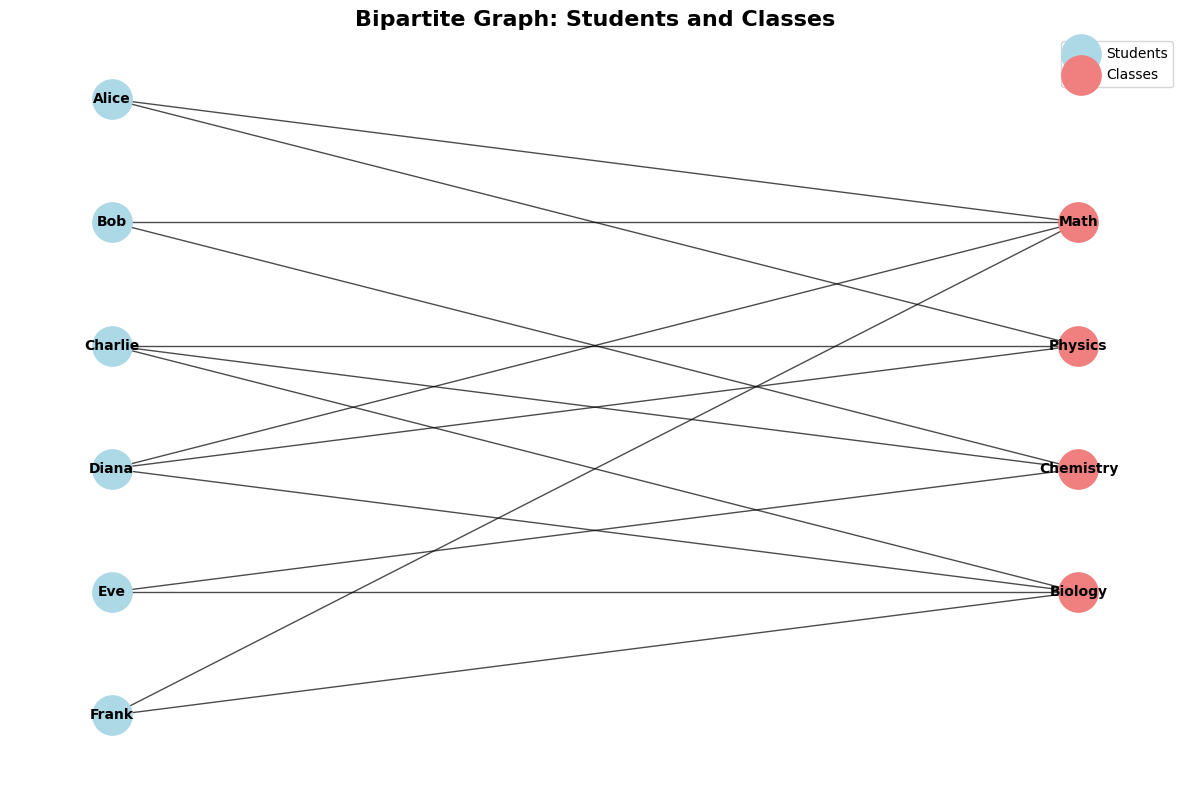

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse import csr_matrix

# Define students and classes
students = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank']
classes = ['Math', 'Physics', 'Chemistry', 'Biology']

# Create incidence matrix (students x classes)
# 1 = student enrolled in class, 0 = not enrolled
incidence_matrix = np.array([
    [1, 1, 0, 0],  # Alice: Math, Physics
    [1, 0, 1, 0],  # Bob: Math, Chemistry
    [0, 1, 1, 1],  # Charlie: Physics, Chemistry, Biology
    [1, 1, 0, 1],  # Diana: Math, Physics, Biology
    [0, 0, 1, 1],  # Eve: Chemistry, Biology
    [1, 0, 0, 1]   # Frank: Math, Biology
])

print("Incidence Matrix (Students × Classes):")
print("        ", "  ".join(f"{cls:>9}" for cls in classes))
for i, student in enumerate(students):
    print(f"{student:>8}: {incidence_matrix[i]}")

# Create bipartite graph from incidence matrix
def create_bipartite_graph_from_incidence(incidence_matrix, students, classes):
    """
    Create a bipartite graph from an incidence matrix.
    
    Parameters:
    - incidence_matrix: 2D array where rows=students, columns=classes
    - students: list of student names
    - classes: list of class names
    
    Returns:
    - NetworkX bipartite graph
    """
    G = nx.Graph()
    
    # Add student nodes with bipartite attribute = 0
    G.add_nodes_from(students, bipartite=0)
    
    # Add class nodes with bipartite attribute = 1
    G.add_nodes_from(classes, bipartite=1)
    
    # Add edges based on incidence matrix
    for i, student in enumerate(students):
        for j, class_name in enumerate(classes):
            if incidence_matrix[i, j] == 1:
                G.add_edge(student, class_name)
    
    return G

# Create the graph
G = create_bipartite_graph_from_incidence(incidence_matrix, students, classes)

# Verify it's bipartite
is_bipartite = nx.is_bipartite(G)
print(f"\nIs the graph bipartite? {is_bipartite}")

# Get bipartite sets
students_set = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
classes_set = {n for n, d in G.nodes(data=True) if d['bipartite'] == 1}
print(f"Student set: {students_set}")
print(f"Class set: {classes_set}")

# Calculate some statistics
print(f"\nGraph Statistics:")
print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")
print(f"Average degree: {np.mean([d for n, d in G.degree()]):.2f}")

# Show enrollment per student
print(f"\nEnrollment per student:")
for student in students:
    enrolled_classes = list(G.neighbors(student))
    print(f"{student}: {enrolled_classes} ({len(enrolled_classes)} classes)")

# Show enrollment per class
print(f"\nEnrollment per class:")
for class_name in classes:
    enrolled_students = list(G.neighbors(class_name))
    print(f"{class_name}: {enrolled_students} ({len(enrolled_students)} students)")

# Visualize the bipartite graph
plt.figure(figsize=(12, 8))

# Position nodes in two columns
pos = {}
# Position students on the left
for i, student in enumerate(students):
    pos[student] = (0, len(students) - i - 1)

# Position classes on the right
for i, class_name in enumerate(classes):
    pos[class_name] = (1, len(classes) - i - 1 + (len(students) - len(classes)) / 2)

# Draw the graph
nx.draw_networkx_nodes(G, pos, nodelist=students, node_color='lightblue', 
                       node_size=800, label='Students')
nx.draw_networkx_nodes(G, pos, nodelist=classes, node_color='lightcoral', 
                       node_size=800, label='Classes')
nx.draw_networkx_edges(G, pos, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title('Bipartite Graph: Students and Classes', fontsize=16, fontweight='bold')
plt.legend()
plt.axis('off')
plt.tight_layout()
plt.show()

Edge List Data:
    Student      Class
0     Alice       Math
1     Alice    Physics
2       Bob       Math
3       Bob  Chemistry
4   Charlie    Physics
5   Charlie  Chemistry
6   Charlie    Biology
7     Diana       Math
8     Diana    Physics
9     Diana    Biology
10      Eve  Chemistry
11      Eve    Biology
12    Frank       Math
13    Frank    Biology

Total affiliations: 14

Affiliation Network Created:
Total nodes: 10
Total edges: 14
Is bipartite: True

Network Analysis:
Persons: 6 (['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank'])
Affiliations: 4 (['Math', 'Physics', 'Chemistry', 'Biology'])

Degree Statistics:
Average affiliations per person: 2.33
Average persons per affiliation: 3.50
Max affiliations per person: 3
Max persons per affiliation: 4

Most Active Persons:
  Charlie: 3 affiliations
  Diana: 3 affiliations
  Alice: 2 affiliations

Most Popular Affiliations:
  Math: 4 persons
  Biology: 4 persons
  Physics: 3 persons

Incidence Matrix (Persons × Affiliations):
 

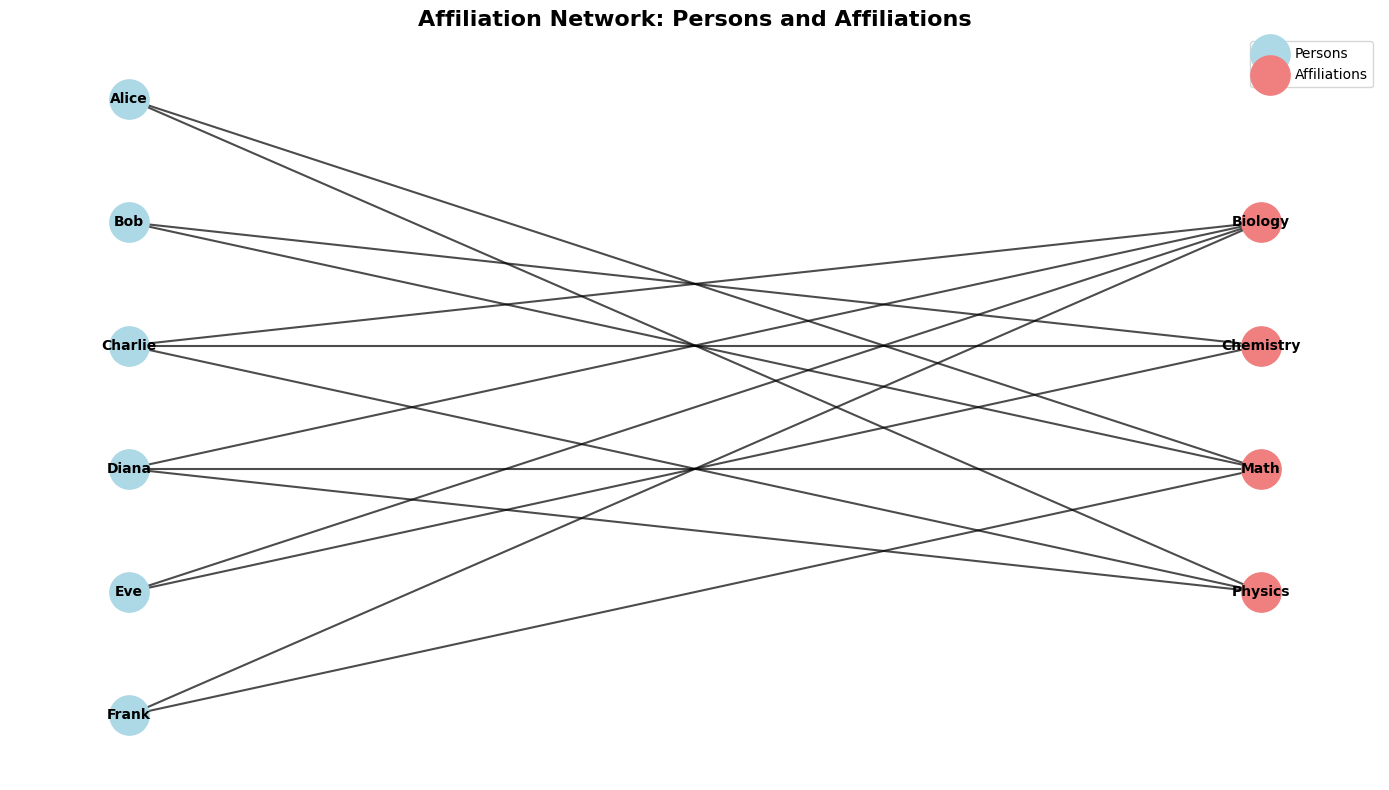


Weighted Person Projection (shared affiliations):
  Alice -- Bob: weight=1
  Alice -- Charlie: weight=1
  Alice -- Diana: weight=2
  Alice -- Frank: weight=1
  Bob -- Charlie: weight=1
  Bob -- Diana: weight=1
  Bob -- Eve: weight=1
  Bob -- Frank: weight=1
  Charlie -- Diana: weight=2
  Charlie -- Eve: weight=2
  Charlie -- Frank: weight=1
  Diana -- Eve: weight=1
  Diana -- Frank: weight=2
  Eve -- Frank: weight=1


In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Edge list format: each row represents a connection between two entities
# For affiliation networks, this typically means (person, affiliation)
edge_list_data = [
    ('Alice', 'Math'),
    ('Alice', 'Physics'),
    ('Bob', 'Math'),
    ('Bob', 'Chemistry'),
    ('Charlie', 'Physics'),
    ('Charlie', 'Chemistry'),
    ('Charlie', 'Biology'),
    ('Diana', 'Math'),
    ('Diana', 'Physics'),
    ('Diana', 'Biology'),
    ('Eve', 'Chemistry'),
    ('Eve', 'Biology'),
    ('Frank', 'Math'),
    ('Frank', 'Biology')
]

# Create DataFrame for easier manipulation
edge_df = pd.DataFrame(edge_list_data, columns=['Student', 'Class'])
print("Edge List Data:")
print(edge_df)
print(f"\nTotal affiliations: {len(edge_df)}")

def create_affiliation_network_from_edgelist(edge_list, person_col=0, affiliation_col=1):
    """
    Create a bipartite affiliation network from an edge list.
    
    Parameters:
    - edge_list: list of tuples or DataFrame with (person, affiliation) pairs
    - person_col: column index/name for person entities
    - affiliation_col: column index/name for affiliation entities
    
    Returns:
    - NetworkX bipartite graph
    """
    G = nx.Graph()
    
    # Handle both list of tuples and DataFrame inputs
    if isinstance(edge_list, pd.DataFrame):
        edges = edge_list[[person_col, affiliation_col]].values.tolist()
        persons = edge_list[person_col].unique().tolist()
        affiliations = edge_list[affiliation_col].unique().tolist()
    else:
        edges = edge_list
        persons = list(set(edge[person_col] for edge in edge_list))
        affiliations = list(set(edge[affiliation_col] for edge in edge_list))
    
    # Add person nodes (bipartite=0)
    G.add_nodes_from(persons, bipartite=0, node_type='person')
    
    # Add affiliation nodes (bipartite=1)
    G.add_nodes_from(affiliations, bipartite=1, node_type='affiliation')
    
    # Add edges
    G.add_edges_from(edges)
    
    return G

# Create the affiliation network
G = create_affiliation_network_from_edgelist(edge_df, 'Student', 'Class')

print(f"\nAffiliation Network Created:")
print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")
print(f"Is bipartite: {nx.is_bipartite(G)}")

def analyze_affiliation_network(G, person_type='person', affiliation_type='affiliation'):
    """Analyze key properties of the affiliation network."""
    
    # Get node sets
    persons = [n for n, attr in G.nodes(data=True) if attr.get('node_type') == person_type]
    affiliations = [n for n, attr in G.nodes(data=True) if attr.get('node_type') == affiliation_type]
    
    print(f"\nNetwork Analysis:")
    print(f"Persons: {len(persons)} ({persons})")
    print(f"Affiliations: {len(affiliations)} ({affiliations})")
    
    # Degree analysis
    print(f"\nDegree Statistics:")
    person_degrees = [G.degree(p) for p in persons]
    affiliation_degrees = [G.degree(a) for a in affiliations]
    
    print(f"Average affiliations per person: {np.mean(person_degrees):.2f}")
    print(f"Average persons per affiliation: {np.mean(affiliation_degrees):.2f}")
    print(f"Max affiliations per person: {max(person_degrees)}")
    print(f"Max persons per affiliation: {max(affiliation_degrees)}")
    
    # Most connected entities
    print(f"\nMost Active Persons:")
    for person in sorted(persons, key=lambda x: G.degree(x), reverse=True)[:3]:
        print(f"  {person}: {G.degree(person)} affiliations")
    
    print(f"\nMost Popular Affiliations:")
    for aff in sorted(affiliations, key=lambda x: G.degree(x), reverse=True)[:3]:
        print(f"  {aff}: {G.degree(aff)} persons")
    
    return persons, affiliations

persons, affiliations = analyze_affiliation_network(G)

def affiliation_network_to_incidence_matrix(G, persons, affiliations):
    """
    Convert bipartite graph to incidence matrix.
    
    Returns:
    - incidence_matrix: numpy array (persons × affiliations)
    - person_index: mapping from person name to row index
    - affiliation_index: mapping from affiliation name to column index
    """
    person_index = {person: i for i, person in enumerate(persons)}
    affiliation_index = {aff: j for j, aff in enumerate(affiliations)}
    
    matrix = np.zeros((len(persons), len(affiliations)), dtype=int)
    
    for person, aff in G.edges():
        i = person_index[person]
        j = affiliation_index[aff]
        matrix[i, j] = 1
    
    return matrix, person_index, affiliation_index

incidence_matrix, person_idx, aff_idx = affiliation_network_to_incidence_matrix(G, persons, affiliations)

print(f"\nIncidence Matrix (Persons × Affiliations):")
affiliation_names = [aff for aff, idx in sorted(aff_idx.items(), key=lambda x: x[1])]
person_names = [person for person, idx in sorted(person_idx.items(), key=lambda x: x[1])]

print("        ", "  ".join(f"{aff:>9}" for aff in affiliation_names))
for i, person in enumerate(person_names):
    print(f"{person:>8}: {incidence_matrix[i]}")

def project_affiliation_network(G, persons, affiliations, projection_type='person'):
    """
    Project bipartite network to one-mode network.
    
    Parameters:
    - projection_type: 'person' or 'affiliation'
    """
    if projection_type == 'person':
        # Person-person projection: connected if they share affiliations
        projected = nx.bipartite.projected_graph(G, persons)
        node_type = 'Person'
    else:
        # Affiliation-affiliation projection: connected if they share persons
        projected = nx.bipartite.projected_graph(G, affiliations)
        node_type = 'Affiliation'
    
    return projected, node_type

# Create person-person projection
person_projection, _ = project_affiliation_network(G, persons, affiliations, 'person')
print(f"\nPerson-Person Projection:")
print(f"Nodes: {list(person_projection.nodes())}")
print(f"Edges: {list(person_projection.edges())}")

# Create affiliation-affiliation projection
affiliation_projection, _ = project_affiliation_network(G, persons, affiliations, 'affiliation')
print(f"\nAffiliation-Affiliation Projection:")
print(f"Nodes: {list(affiliation_projection.nodes())}")
print(f"Edges: {list(affiliation_projection.edges())}")

def visualize_affiliation_network(G, persons, affiliations, figsize=(14, 8)):
    """Visualize the bipartite affiliation network."""
    plt.figure(figsize=figsize)
    
    # Create positions: persons on left, affiliations on right
    pos = {}
    
    # Position persons
    for i, person in enumerate(sorted(persons)):
        pos[person] = (0, len(persons) - i - 1)
    
    # Position affiliations
    for i, aff in enumerate(sorted(affiliations)):
        pos[aff] = (1, len(affiliations) - i - 1 + (len(persons) - len(affiliations)) / 2)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=persons, 
                          node_color='lightblue', node_size=800, 
                          label='Persons')
    nx.draw_networkx_nodes(G, pos, nodelist=affiliations, 
                          node_color='lightcoral', node_size=800, 
                          label='Affiliations')
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.7, width=1.5)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    plt.title('Affiliation Network: Persons and Affiliations', 
              fontsize=16, fontweight='bold')
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the network
visualize_affiliation_network(G, persons, affiliations)

def load_affiliation_network_from_file(file_path, person_col=0, affiliation_col=1, 
                                    delimiter=',', header=None):
    """
    Load affiliation network from CSV file.
    
    Expected format: each row contains (person, affiliation)
    """
    try:
        df = pd.read_csv(file_path, delimiter=delimiter, header=header)
        df.columns = ['person', 'affiliation']  # Rename for consistency
        
        return create_affiliation_network_from_edgelist(
            df, 'person', 'affiliation'
        )
    except FileNotFoundError:
        print(f"File {file_path} not found. Using sample data.")
        return G

# Example of how you'd use it with a real file:
# G_real = load_affiliation_network_from_file('affiliations.csv')

def create_weighted_projection(G, nodes_to_project, weight_attr='weight'):
    """
    Create weighted projection where edge weights represent 
    number of shared affiliations.
    """
    projected = nx.Graph()
    projected.add_nodes_from(nodes_to_project)
    
    # Calculate shared connections
    for i, node1 in enumerate(nodes_to_project):
        for node2 in nodes_to_project[i+1:]:
            # Find common neighbors (shared affiliations)
            common_neighbors = set(G.neighbors(node1)) & set(G.neighbors(node2))
            if common_neighbors:
                weight = len(common_neighbors)
                projected.add_edge(node1, node2, **{weight_attr: weight})
    
    return projected

# Create weighted person projection
weighted_person_proj = create_weighted_projection(G, persons)
print(f"\nWeighted Person Projection (shared affiliations):")
for edge in weighted_person_proj.edges(data=True):
    print(f"  {edge[0]} -- {edge[1]}: weight={edge[2]['weight']}")

In [21]:
import networkx as nx
import random

# Define the bipartite graph 
edge_list = [
    ('U1', 'E1'), ('U1', 'E2'),
    ('U2', 'E1'), ('U2', 'E3'),
    ('U3', 'E2'), ('U3', 'E4'),
    ('U4', 'E1'),
    ('U5', 'E3'), ('U5', 'E4')
]

G = nx.Graph()
G.add_edges_from(edge_list)

# Partitions
users = ['U1', 'U2', 'U3', 'U4', 'U5']
events = ['E1', 'E2', 'E3', 'E4']

# 1. Find Potential Links (Non-Edges) - "The Points"
# Generate candidate non-edges for prediction
candidates = [(u, e) for u in users for e in events if not G.has_edge(u, e)]

# Simulate test edges (hold out for evaluation)
random.seed(42)
test_edges = random.sample(candidates, 2)
train_candidates = [c for c in candidates if c not in test_edges]

print("Preferential Attachment Predictions:")
for u in users:
    # Candidates for this user (exclude test for simulation)
    u_candidates = [(u, e) for e in events if not G.has_edge(u, e) and (u, e) not in test_edges]
    if u_candidates:
        # Score with preferential attachment
        scores = nx.preferential_attachment(G, u_candidates)
        scored = {}
        for uu, e, score in scores:  # Three-tuple unpacking
            if uu == u:
                scored[e] = score
        if scored:
            top_e = max(scored, key=scored.get)
            print(f"{u} predicted to affiliate with {top_e} (score: {scored[top_e]:.2f})")

# Corrected Evaluation: Manually build dict from 3-tuples
print(f"\nSimulated Test Edges: {test_edges}")
scores_gen = nx.preferential_attachment(G, candidates)
all_scores = { (u, v): score for u, v, score in scores_gen }
test_scores = {edge: all_scores[edge] for edge in test_edges if edge in all_scores}
print(f"Test edge scores: {test_scores}")

# Bonus: Simple "hit rate" (e.g., if test edges have above-average scores)
if test_scores:
    avg_score = sum(all_scores.values()) / len(all_scores)
    hits = sum(1 for score in test_scores.values() if score > avg_score)
    print(f"Hit rate (test edges > avg score): {hits / len(test_scores):.2f}")

Preferential Attachment Predictions:
U1 predicted to affiliate with E3 (score: 4.00)
U2 predicted to affiliate with E2 (score: 4.00)
U3 predicted to affiliate with E1 (score: 6.00)
U4 predicted to affiliate with E2 (score: 2.00)
U5 predicted to affiliate with E1 (score: 6.00)

Simulated Test Edges: [('U5', 'E2'), ('U1', 'E4')]
Test edge scores: {('U5', 'E2'): 4, ('U1', 'E4'): 4}
Hit rate (test edges > avg score): 1.00
